# Handling missing values
Missing values are common occurrences in data. Handling missing data is important as many machine learning algorithms do not support data with missing values.

### Why there are missing values?
During any survey for collecting data, some information are not get collected and due to data corruption.<br>
For instance, most of the time men do not put down their salary information and women do not put down their age information.<br><br>
We need to handle the missing values and the way we handle them is based on the type of data.<br><br>
*Here I will be using House Price Prediction dataset from Kaggle*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv("house_price_prediction.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# taking only some of the categorical variable
data= data[['MSZoning','Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'FireplaceQu']]

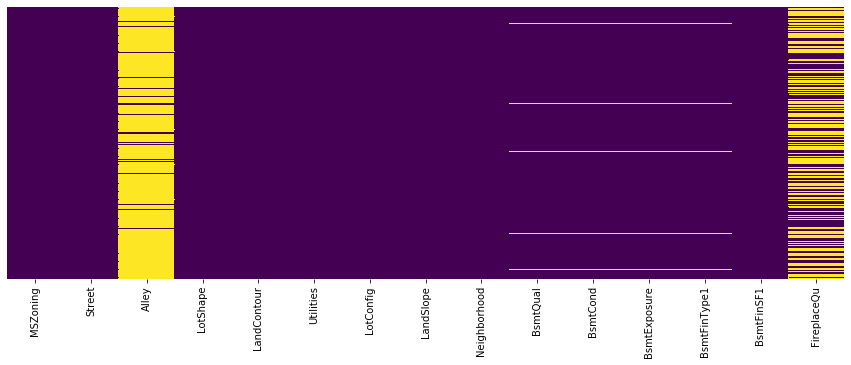

In [6]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,  cmap='viridis')

In [7]:
data.isnull().sum()

MSZoning           0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
FireplaceQu      690
dtype: int64

### 1. Mode imputation
Mode imputation is used where the categorical variable has less number of null values. Because imputing with the mode will not distort the relation between the most frequent label and the target varaible.

In [8]:
# BsmtQual, BsmtCond, BsmtCond and BsmtFinType1 has less number of null values
def impute_mode(df, variable):
    df[variable]= df[variable].fillna(df[variable].mode()[0])
        


In [9]:
# imputing mode in BsmtQual
impute_mode(data, "BsmtQual")

In [10]:
# null values has been removed from BsmtQual
data["BsmtQual"].isnull().sum()

0

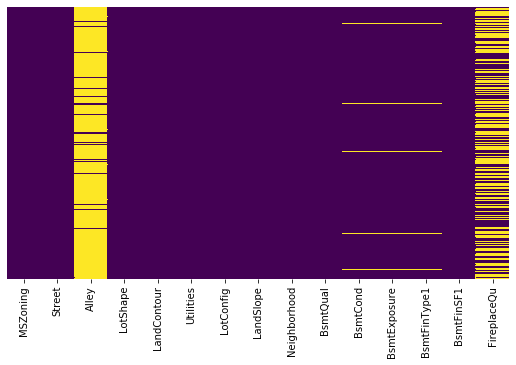

In [11]:
plt.figure(figsize=(9,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,  cmap='viridis')

#### Mode imputation cannot be used for variable with large number of null values

### 2. Assigning a new category
Here we create a new category, say "Unknown" and replace the null values with this new created category.

In [14]:
def impute_new(df, variable):
    df[variable]= df[variable].fillna("Unknown")

In [15]:
# imputing new category to null vallues
impute_new(data,"BsmtQual")

In [18]:
# null values has been removed from BsmtQual
data["BsmtQual"].isnull().sum()

0

#### Creating new category to relace null values will add another feature to model while encoding